In [1]:
## PD Test notebook

## Generate some synthetic dataset - and test Causalnex package 

In [1]:
import os
import pandas as pd
import numpy as np
%pwd


'/home/paul/Software/FDL_2021/crisp/notebooks'

In [2]:
os.chdir("..")

In [3]:
# silence warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import causalnex
from causalnex.structure import StructureModel
from causalnex.structure.notears import from_pandas

from IPython.display import Image
from causalnex.plots import plot_structure, NODE_STYLE, EDGE_STYLE

from synthetic.facebook_synthetic_data_generator import generator_example


## Example 1: Week 3 Formal Review init Results

In [6]:
n_example = 1
dim_inv=6
dim_spu=60
n_exp=1000
n_env=5
save_dir= 'data/synthetic'
test=False 


In [30]:
# generator_example(n_example, dim_inv, dim_spu, n_exp, n_env, save_dir, test)
# file = os.path.join(save_dir,"data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test) )
# df_train = pd.read_pickle(file, "rb")

In [31]:
file = os.path.join(save_dir,"data_train.csv")
file

'data/synthetic/data_train.csv'

In [56]:
df_train = pd.read_csv(file).iloc[:,1:]
df_train = df_train.drop(columns=["env_split", "Subj_ID"])
print(df_train.shape)
df_train.head()

(300, 67)


,Causal_0,Causal_1,Causal_2,Causal_3,Causal_4,Causal_5,Non_causal_0,Non_causal_1,Non_causal_2,Non_causal_3,...,Non_causal_51,Non_causal_52,Non_causal_53,Non_causal_54,Non_causal_55,Non_causal_56,Non_causal_57,Non_causal_58,Non_causal_59,Target
0,0.061337,0.046341,0.093852,0.142529,0.150833,0.010539,1.428813,0.584076,-1.320398,-0.277928,...,0.317698,-0.548764,0.809392,-0.411358,0.560004,0.305735,1.897828,-0.930516,0.639870,-0.109004
1,-0.160500,-0.010645,-0.090426,-0.061033,0.073980,-0.017860,-1.927465,0.456939,0.888123,0.776263,...,0.379042,-0.609867,-0.837989,-0.179053,-0.410556,-0.554853,-0.191771,-0.550125,0.441841,0.237107
2,0.007849,-0.043982,-0.036079,-0.126174,0.071717,0.077703,-1.021967,-2.087538,-0.155693,-1.193389,...,0.379642,-0.131982,0.409925,0.586803,-0.834029,0.561229,0.215859,1.298801,-1.444370,-0.082524
3,-0.000967,0.026039,0.028203,0.025830,-0.042655,0.098075,0.228841,-0.792215,1.506295,-0.958674,...,0.047666,2.207937,0.779697,0.000787,-1.889774,-1.479429,0.823252,-0.069654,0.213621,0.106596
4,-0.008607,-0.161898,0.076300,0.022762,-0.145698,0.170437,-1.071498,0.134142,0.572669,-1.482002,...,0.650741,1.484956,0.444848,-1.187164,-0.416942,0.165646,-0.348239,2.133875,-0.712147,-0.076211


In [53]:
sm = from_pandas(df_train, tabu_child_nodes=list(df_train.columns[:-1]))

In [54]:
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])
sorted(zip(temp.values(), temp.keys()), reverse=True)#[:50]


[(0.9901584192257143, 'Causal_0_Target'),
 (0.8462283688046218, 'Causal_5_Target'),
 (0.7139894327236213, 'Causal_4_Target'),
 (0.6479747635978667, 'Non_causal_41_Target'),
 (0.6458195899479231, 'Non_causal_58_Target'),
 (0.5665979128385252, 'Non_causal_7_Target'),
 (0.5637456998963807, 'Non_causal_24_Target'),
 (0.5100658969415852, 'Non_causal_13_Target'),
 (0.4889323713381053, 'Non_causal_0_Target'),
 (0.4728059013057373, 'Non_causal_35_Target'),
 (0.44342284101588625, 'Causal_3_Target'),
 (0.4228157843217627, 'Non_causal_9_Target'),
 (0.4168190838881371, 'Non_causal_11_Target'),
 (0.40954932404960726, 'Non_causal_48_Target'),
 (0.4084168207947114, 'Non_causal_22_Target'),
 (0.4045433040714377, 'Non_causal_18_Target'),
 (0.402401442255577, 'Non_causal_33_Target'),
 (0.3667189230604628, 'Non_causal_15_Target'),
 (0.3579495854090835, 'Causal_1_Target'),
 (0.3573468465200692, 'Non_causal_32_Target'),
 (0.33305004240128866, 'Non_causal_31_Target'),
 (0.3166657886949894, 'Non_causal_57_Ta

In [57]:
sm = from_pandas(df_train)
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])
sorted(zip(temp.values(), temp.keys()), reverse=True)#[:50]

[(0.9901646623272511, 'Causal_0_Target'),
 (0.8462048831749, 'Causal_5_Target'),
 (0.7140200773519061, 'Causal_4_Target'),
 (0.6479868636858764, 'Non_causal_41_Target'),
 (0.645803523051973, 'Non_causal_58_Target'),
 (0.5665942308522424, 'Non_causal_7_Target'),
 (0.5637472510967313, 'Non_causal_24_Target'),
 (0.5100507069771245, 'Non_causal_13_Target'),
 (0.4889707181796216, 'Non_causal_0_Target'),
 (0.4728078209488636, 'Non_causal_35_Target'),
 (0.4434268388921635, 'Causal_3_Target'),
 (0.42282749780772705, 'Non_causal_9_Target'),
 (0.4167860606804307, 'Non_causal_11_Target'),
 (0.4095532154807847, 'Non_causal_48_Target'),
 (0.40844100215600937, 'Non_causal_22_Target'),
 (0.4045641341356781, 'Non_causal_18_Target'),
 (0.40239544977785907, 'Non_causal_33_Target'),
 (0.36674359196413586, 'Non_causal_15_Target'),
 (0.3640806216151321, 'Non_causal_44_Non_causal_14'),
 (0.35794767899918956, 'Causal_1_Target'),
 (0.3573695770740844, 'Non_causal_32_Target'),
 (0.3331234945148045, 'Non_causal

In [51]:
df_train = pd.read_csv(file).iloc[:,1:]
df_train = df_train[df_train["env_split"]==0]
df_train = df_train.drop(columns=["env_split", "Subj_ID"])
print(df_train.shape)
df_train.head()

(60, 67)


,Causal_0,Causal_1,Causal_2,Causal_3,Causal_4,Causal_5,Non_causal_0,Non_causal_1,Non_causal_2,Non_causal_3,...,Non_causal_51,Non_causal_52,Non_causal_53,Non_causal_54,Non_causal_55,Non_causal_56,Non_causal_57,Non_causal_58,Non_causal_59,Target
240,0.005427,0.030687,-0.079467,-0.046405,0.048768,0.002324,-1.727939,0.791337,1.822480,-0.929136,...,1.056983,1.295717,0.848151,-1.045376,1.119466,-0.580585,0.595518,0.560622,-0.816843,-0.292355
241,-0.056566,-0.074819,-0.057442,0.005841,-0.140800,0.056798,0.312113,0.516693,0.510172,-1.182426,...,0.487205,0.570417,-0.582103,-2.053713,-0.052903,0.175993,0.302450,-0.779291,-0.017644,0.009083
242,-0.028059,0.042604,0.028730,-0.121175,-0.060475,-0.035504,-0.507185,-0.625208,0.340181,-2.072641,...,1.295161,0.326241,-0.316253,-1.357747,0.532608,-1.116097,-2.783865,0.711306,-0.799663,0.186500
243,0.053328,0.221824,-0.010492,-0.121330,-0.124966,-0.126079,-0.287261,-0.966994,0.738346,1.053638,...,0.043310,-0.277053,-0.571217,-1.622165,1.090143,0.217942,0.154822,0.508009,-0.776315,-0.144556
244,-0.020654,0.021031,0.053146,-0.019001,-0.001636,-0.002964,-0.694909,-0.962066,1.322960,-0.284772,...,2.932180,-0.026196,-0.213344,1.153178,-0.255380,-0.512669,0.419617,-0.574068,-0.644349,0.210300


In [49]:
sm = from_pandas(df_train, tabu_child_nodes=list(df_train.columns[:-1]))
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])
sorted(zip(temp.values(), temp.keys()), reverse=True)#[:50]


[(0.22517893395545943, 'Non_causal_9_Target'),
 (0.2080829726190504, 'Non_causal_0_Target'),
 (0.12646742497705635, 'Non_causal_43_Target'),
 (0.1251966008025476, 'Non_causal_55_Target'),
 (0.12255722025069701, 'Non_causal_48_Target'),
 (0.11003820624556535, 'Non_causal_46_Target'),
 (0.10958749985527187, 'Non_causal_39_Target'),
 (0.10742399958815545, 'Non_causal_3_Target'),
 (0.1064213297317163, 'Non_causal_4_Target'),
 (0.10562798130742754, 'Non_causal_8_Target'),
 (0.10430690004045899, 'Non_causal_18_Target'),
 (0.10390304499052631, 'Non_causal_35_Target'),
 (0.1032626944590674, 'Non_causal_40_Target'),
 (0.10234432165357073, 'Non_causal_44_Target'),
 (0.1020381430281881, 'Non_causal_50_Target'),
 (0.10073037552378206, 'Non_causal_27_Target'),
 (0.09911970416757315, 'Non_causal_7_Target'),
 (0.09817494337719089, 'Non_causal_54_Target'),
 (0.095543258824451, 'Non_causal_30_Target'),
 (0.0940998046121776, 'Non_causal_10_Target'),
 (0.09247757877381013, 'Non_causal_34_Target'),
 (0.09

## Example 1 dataset from FB synthetic experiments

In [7]:

n_example = 1
dim_inv=2
dim_spu=2
n_exp=4000
n_env=1 
save_dir= 'data/synthetic'
test=False 

generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)
df_train = pd.read_pickle(os.path.join(save_dir,"data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test) ))
df_train = df_train[df_train["env_split"]==0]
df_train = df_train.drop(columns=["env_split", "Subj_ID"])
df_train.head()

Environments variables: {'E0': 0.1}
Generated Synthetic Data according to the Facebook setup Example: 1


,Causal_0,Causal_1,Non_causal_0,Non_causal_1,Target
0,-0.135265,-0.169593,-1.227448,0.093607,-0.118588
1,0.056665,0.079351,0.275583,1.231652,-0.176071
2,0.059884,-0.155510,-1.350874,-0.551046,0.139940
3,-0.034136,0.185301,0.101519,0.825266,-0.218418
4,0.075019,-0.058550,1.160002,-1.143421,0.087239


In [6]:
test=True

generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)
df_train = pd.read_pickle(os.path.join(save_dir,"data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test) ))
df_train = df_train[df_train["env_split"]==0]
df_train = df_train.drop(columns=["env_split", "Subj_ID"])
df_train.head()

Environments variables: {'E0': 0.1}
Generated Synthetic Data according to the Facebook setup Example: 1


,Causal_0,Causal_1,Non_causal_0,Non_causal_1,Target
0,-0.071926,-0.040334,0.539178,-1.270665,-0.031710
1,-0.059664,0.018204,0.236144,1.326676,-0.291985
2,-0.085667,0.110060,0.098062,-0.534975,0.040633
3,-0.107119,0.012270,-1.234010,-0.740109,0.094767


In [8]:
df_train.shape

(4000, 5)

## Exmaple 2: binary classifier

In [6]:
n_example = 2
dim_inv=2
dim_spu=2
n_exp=1000
n_env=2
save_dir= 'data/synthetic'
test=False 

generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)
df_train = pd.read_pickle(os.path.join(save_dir,"data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test) ))
df_train = df_train.drop(columns=["Subj_ID"])
df_train.head()

Environments variables: {'E0': {'p': 0.95, 's': 0.3}, 'E1': {'p': 0.97, 's': 0.5}}
Generated Synthetic Data according to the Facebook setup Example: 2


,Causal_0,Causal_1,Non_causal_0,Non_causal_1,env_split,Target
0,-0.012518,-0.010995,0.735552,0.419580,0.0,0.0
1,-0.013195,-0.011156,-0.849317,-1.039018,0.0,0.0
2,-0.009930,-0.006877,-1.080872,-0.899665,0.0,0.0
3,-0.011774,-0.009651,-1.265809,-0.749590,0.0,0.0
4,-0.007573,-0.008841,-1.222696,-1.061764,0.0,0.0


In [12]:
bobs_data = df_train[df_train["env_split"]==0]
bobs_data = bobs_data.drop(columns=["env_split"])
bobs_data.to_csv('FL_workspace/data/bob/data.csv', index=False)

In [13]:
betty_data = df_train[df_train["env_split"]==1]
betty_data = betty_data.drop(columns=["env_split"])
betty_data.to_csv('FL_workspace/data/betty/data.csv', index=False)

## Testing Causalnex: 

In [8]:
sm = from_pandas(df_train, tabu_child_nodes=list(df_train.columns[:-1]))

In [9]:
sm = from_pandas(df_train)

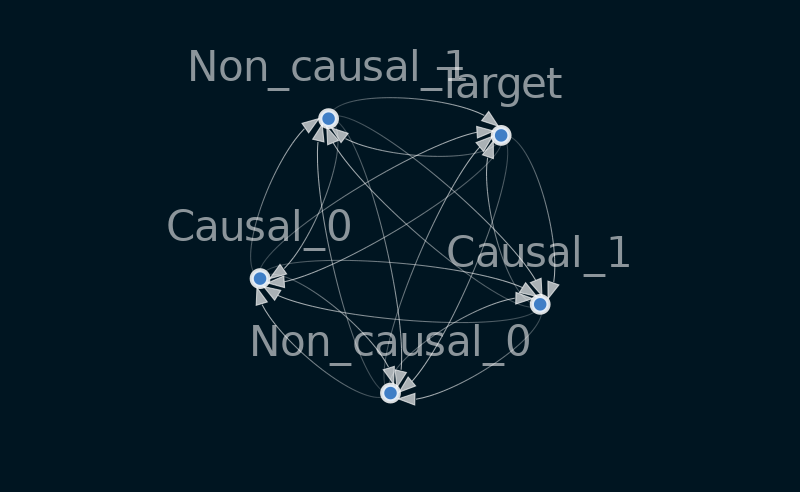

In [10]:
# sm.remove_edges_below_threshold(0.6)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.8"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

## Use the Strucural Model to reduce features

In [11]:
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])

sorted(zip(temp.values(), temp.keys()), reverse=True)[:50]

[(0.8133868290756585, 'Causal_1_Target'),
 (0.6044801283894697, 'Causal_0_Target'),
 (0.43410222121515213, 'Causal_1_Non_causal_0'),
 (0.37295806374539475, 'Causal_1_Non_causal_1'),
 (0.30817568862832573, 'Target_Non_causal_0'),
 (0.29362700109568507, 'Causal_0_Non_causal_0'),
 (0.2648094819561558, 'Target_Non_causal_1'),
 (0.04308252101395693, 'Causal_0_Non_causal_1'),
 (0.01957799312355254, 'Non_causal_1_Non_causal_0'),
 (0.00896147236813354, 'Causal_1_Causal_0'),
 (0.0017601315244962297, 'Non_causal_0_Non_causal_1'),
 (9.153772996489967e-05, 'Causal_0_Causal_1'),
 (4.982220950392364e-06, 'Non_causal_1_Causal_0'),
 (2.86136866012975e-06, 'Non_causal_1_Target'),
 (2.435759818607512e-06, 'Non_causal_0_Target'),
 (1.5763300619246662e-06, 'Non_causal_0_Causal_0'),
 (1.44947541197123e-06, 'Non_causal_1_Causal_1'),
 (1.1253997180966421e-06, 'Non_causal_0_Causal_1'),
 (5.693522221451782e-07, 'Target_Causal_0'),
 (3.783474030153103e-07, 'Target_Causal_1')]

## Example 4: mixed input type Regression

In [9]:
n_example = 4
dim_inv= (2,2)
dim_spu= (2,1)
n_exp=1000
n_env=2
save_dir= 'data/synthetic'
test=False 

generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)
df_train = pd.read_pickle(os.path.join(save_dir,"data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv[0]+dim_inv[1], dim_spu[0]+dim_spu[1], n_exp, n_env,test) ))

Environments variables: {'E0': 0.3, 'E1': 0.7}
Generated Synthetic Data according to the Facebook setup Example: 4


In [10]:
# df_train = df_train[df_train["env_split"]==0]
# df_train = df_train.drop(columns=["env_split", "Subj_ID"])
df_train.head(100)

,Causal_0,Causal_1,Causal_2,Causal_3,Non_causal_0,Non_causal_1,Non_causal_2,env_split,Subj_ID,Target
0,-0.107932,-0.371274,0.0,0.0,-0.174203,0.441946,1.0,0.0,0.0,0.524167
1,0.281361,0.129814,0.0,1.0,-0.156821,-0.030168,0.0,0.0,1.0,0.483813
2,-0.086980,-0.339373,1.0,0.0,-0.234769,0.340815,0.0,0.0,2.0,-0.112154
3,0.469130,0.244435,0.0,0.0,0.300202,-0.401027,1.0,0.0,3.0,0.055201
4,0.601612,0.042267,1.0,1.0,-0.688245,0.697613,1.0,0.0,4.0,1.694770
...,...,...,...,...,...,...,...,...,...,...
95,-0.025955,-0.314215,1.0,1.0,-0.678976,0.634812,1.0,0.0,95.0,1.767226
96,-0.326900,0.859912,0.0,1.0,0.114429,-0.377570,1.0,0.0,96.0,0.346196
97,-0.480478,-0.318751,0.0,0.0,-0.209453,0.214311,1.0,0.0,97.0,0.179908
98,0.037362,0.279985,0.0,1.0,-0.269918,-0.119605,1.0,0.0,98.0,1.269010


## Example 5: multi-class classification

In [13]:

n_example = 5
dim_inv=2
dim_spu=2
n_exp=2000
n_env=5
save_dir= 'data/synthetic'
test=False 

generator_example(n_example, dim_inv, dim_spu, n_exp, n_env ,save_dir, test)


Environments variables: {'E0': {'p': [0.8, 0.1, 0.1], 's': [0.3, 0.4, 0.3]}, 'E1': {'p': [0.9, 0.05, 0.05], 's': [0.4, 0.3, 0.3]}, 'E2': {'p': [0.97, 0.01, 0.02], 's': [0.3, 0.3, 0.4]}, 'E3': {'p': [0.7517796754837036, 0.2181669920682907, 0.030053338035941124], 's': [0.3620770573616028, 0.2986242175102234, 0.3392987549304962]}, 'E4': {'p': [0.4979023337364197, 0.28680261969566345, 0.21529506146907806], 's': [0.474641352891922, 0.23899394273757935, 0.28636470437049866]}}
Generated Synthetic Data according to the Facebook setup Example: 5


In [14]:
df_train = pd.read_pickle(os.path.join(save_dir,"data_fb_example_%s_dim_inv_%s_dim_spu_%s_n_exp_%s_n_env_%s_test_%s.pickle" %(n_example, dim_inv, dim_spu, n_exp, n_env,test) ))
df_train = df_train[df_train["env_split"]==0]

df_train = df_train.drop(columns=["env_split", "Subj_ID"])
df_train.head(100)

,Causal_0,Causal_1,Non_causal_0,Non_causal_1,Target
0,-0.005174,-0.007939,0.070209,-0.163660,2.0
1,-0.013916,-0.012940,-0.074698,-0.264357,2.0
2,0.019849,0.007436,1.080418,0.479832,1.0
3,0.006505,0.007713,0.862493,0.335052,1.0
4,-0.007604,-0.016457,-1.089035,-1.109211,2.0
...,...,...,...,...,...
95,0.001699,0.002156,-0.302806,0.383880,0.0
96,0.010942,0.015722,0.142089,0.351876,1.0
97,-0.010289,-0.006544,0.637931,0.543065,2.0
98,0.008223,0.012100,0.927397,1.049818,1.0


In [7]:
pd.unique(df_train["Target"])

array([0., 1., 2.])

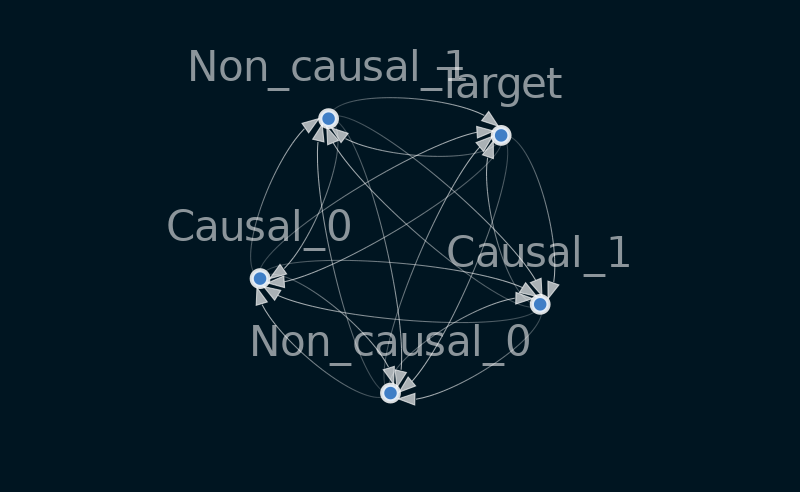

In [19]:
sm = from_pandas(df_train)
# sm.remove_edges_below_threshold(0.7)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.8"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [20]:
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])

sorted(zip(temp.values(), temp.keys()), reverse=True)[:50]

[(46.44647470905783, 'Causal_0_Target'),
 (30.58508135482301, 'Causal_1_Non_causal_0'),
 (29.858559295530036, 'Causal_0_Non_causal_0'),
 (16.856138960664858, 'Causal_1_Non_causal_1'),
 (5.656249620584626, 'Causal_0_Non_causal_1'),
 (2.3476631624455306, 'Causal_1_Target'),
 (0.9933825032389858, 'Causal_0_Causal_1'),
 (0.7382950423897879, 'Non_causal_0_Non_causal_1'),
 (0.0554174432471011, 'Non_causal_1_Target'),
 (0.025992773088585126, 'Non_causal_0_Target'),
 (0.0008989738551279088, 'Target_Non_causal_0'),
 (6.593553716562014e-05, 'Target_Non_causal_1'),
 (2.0729449611622416e-05, 'Non_causal_1_Non_causal_0'),
 (1.0908064359778147e-07, 'Target_Causal_1'),
 (5.022509852635014e-08, 'Causal_1_Causal_0'),
 (1.0247364284294437e-08, 'Non_causal_0_Causal_1'),
 (6.594181968673638e-09, 'Target_Causal_0'),
 (4.91007134271166e-09, 'Non_causal_1_Causal_0'),
 (8.440657522065478e-10, 'Non_causal_0_Causal_0'),
 (9.801086727544386e-12, 'Non_causal_1_Causal_1')]

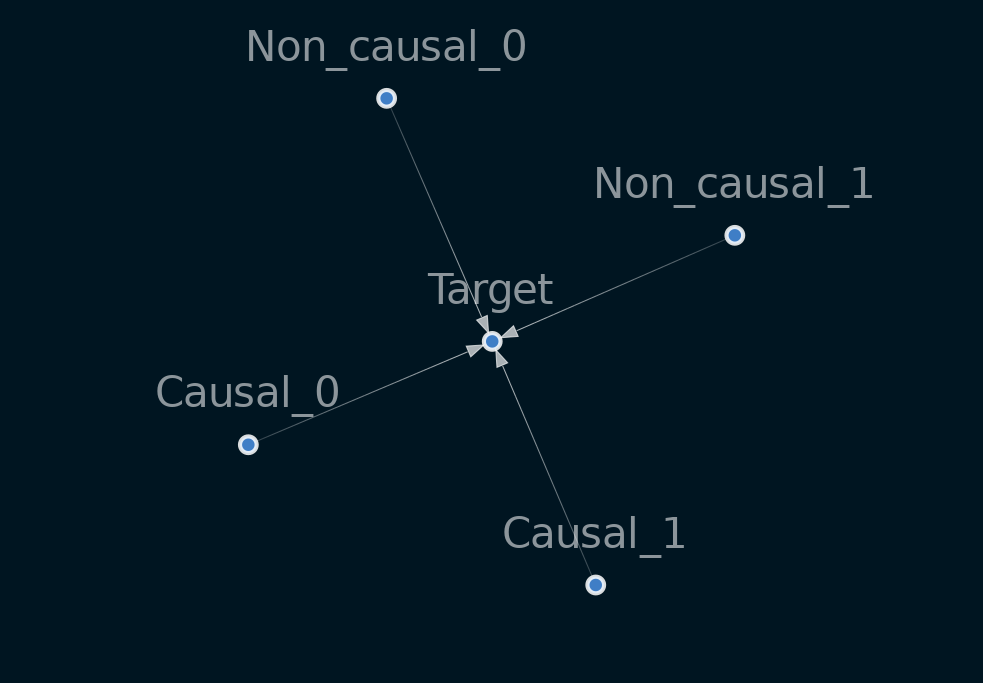

In [17]:
sm = from_pandas(df_train, tabu_child_nodes=list(df_train.columns[:-1]))
# sm.remove_edges_below_threshold(0.7)
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.8"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))

In [18]:
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])

sorted(zip(temp.values(), temp.keys()), reverse=True)[:50]

[(48.52325612216164, 'Causal_0_Target'),
 (0.09867085581080885, 'Causal_1_Target'),
 (0.057476628855487745, 'Non_causal_1_Target'),
 (0.03453213267817463, 'Non_causal_0_Target')]

# Hidden Confounder: 

In [5]:
from synthetic.synthetic_generator_conf import synthetic_generator_counfounder
from synthetic.synthetic_generator import synthetic_generator


In [8]:
n_exp = 900
output_data_type = "real-valued"
d_layer=3
n_layers=[10,10,10]
mu=0
sigma=1
dim_causal=6
n_env = 3
test = "Train"
save_dir = 'data/synthetic'

confounder_df = synthetic_generator_counfounder(n_exp, d_layer, n_layers, mu, sigma, dim_causal, n_env, output_data_type)
name = "full_fw_synthetic__conf_%s_dim_causal_%s_n_exp_%s_n_env_%s_test.pickle" % (dim_causal, n_exp, n_env, test)
confounder_df.to_pickle(os.path.join(save_dir, name))
confounder_df.head()


,Confounder,Non_causal_1,Non_causal_2,Non_causal_3,Causal_0,Non_causal_4,Non_causal_5,Causal_1,Causal_2,Non_causal_6,...,Non_causal_18,Non_causal_19,Non_causal_20,Non_causal_21,Non_causal_22,Non_causal_23,Non_causal_24,Target,Subj_ID,env_split
0,0.249693,-0.469216,-1.649596,-1.466880,-1.257051,0.732611,0.225582,-1.370459,-1.424103,-1.623024,...,-1.389750,-1.198073,1.622808,0.213899,-0.536437,0.483035,-0.785065,-4.924835,0,0
1,0.228321,0.462123,0.429437,-0.538297,-1.457646,0.436824,-0.084177,-1.406928,-0.436873,0.393219,...,-0.207374,-0.633169,0.721706,-0.079403,0.425865,0.302781,-0.956020,-2.451517,1,0
2,0.380606,1.703756,0.198277,1.686309,1.082223,0.573346,-0.509764,1.694573,0.274219,1.410320,...,1.370960,0.678445,-0.343663,0.543009,0.566276,0.290121,0.694002,4.536168,2,0
3,0.351986,-0.787918,1.786194,-0.637583,-1.572155,0.816073,-0.974751,-0.127322,1.310814,-1.412479,...,0.585252,-1.410108,1.932564,-0.957290,-0.050775,0.178953,-1.293925,-7.211583,3,0
4,1.214711,1.192832,-0.147807,-0.305934,1.353262,-0.621032,0.231116,-0.960506,-0.096258,1.490200,...,-0.559221,1.253884,-0.690345,0.237667,0.346079,-1.102902,0.973017,3.319899,4,0


In [11]:
df = confounder_df #[confounder_df["env_split"]==0]
df = df.drop(columns=[ "env_split", "Subj_ID"])
df.head()

,Confounder,Non_causal_1,Non_causal_2,Non_causal_3,Causal_0,Non_causal_4,Non_causal_5,Causal_1,Causal_2,Non_causal_6,...,Non_causal_16,Non_causal_17,Non_causal_18,Non_causal_19,Non_causal_20,Non_causal_21,Non_causal_22,Non_causal_23,Non_causal_24,Target
0,0.249693,-0.469216,-1.649596,-1.466880,-1.257051,0.732611,0.225582,-1.370459,-1.424103,-1.623024,...,-1.479194,0.441028,-1.389750,-1.198073,1.622808,0.213899,-0.536437,0.483035,-0.785065,-4.924835
1,0.228321,0.462123,0.429437,-0.538297,-1.457646,0.436824,-0.084177,-1.406928,-0.436873,0.393219,...,-1.223471,0.517874,-0.207374,-0.633169,0.721706,-0.079403,0.425865,0.302781,-0.956020,-2.451517
2,0.380606,1.703756,0.198277,1.686309,1.082223,0.573346,-0.509764,1.694573,0.274219,1.410320,...,1.104094,-0.614324,1.370960,0.678445,-0.343663,0.543009,0.566276,0.290121,0.694002,4.536168
3,0.351986,-0.787918,1.786194,-0.637583,-1.572155,0.816073,-0.974751,-0.127322,1.310814,-1.412479,...,-1.728441,-1.240613,0.585252,-1.410108,1.932564,-0.957290,-0.050775,0.178953,-1.293925,-7.211583
4,1.214711,1.192832,-0.147807,-0.305934,1.353262,-0.621032,0.231116,-0.960506,-0.096258,1.490200,...,1.217202,2.082478,-0.559221,1.253884,-0.690345,0.237667,0.346079,-1.102902,0.973017,3.319899


In [12]:
sm = from_pandas(df, tabu_child_nodes=list(df.columns[:-1]))
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])

sorted(zip(temp.values(), temp.keys()), reverse=True)[:50]

[(5.157286303254305, 'Causal_3_Target'),
 (4.541127174782975, 'Non_causal_13_Target'),
 (4.50621154293617, 'Non_causal_20_Target'),
 (3.8933291585171563, 'Causal_4_Target'),
 (3.458592766692457, 'Non_causal_12_Target'),
 (1.8367654414079904, 'Non_causal_19_Target'),
 (1.4764493212615974, 'Non_causal_15_Target'),
 (1.3050713121199018, 'Causal_0_Target'),
 (0.9735539685664397, 'Non_causal_6_Target'),
 (0.8514908552225963, 'Non_causal_14_Target'),
 (0.8155245169621782, 'Causal_1_Target'),
 (0.7153735109429308, 'Non_causal_21_Target'),
 (0.6889625999223491, 'Causal_2_Target'),
 (0.5852533154167481, 'Non_causal_10_Target'),
 (0.5553412705640244, 'Confounder_Target'),
 (0.5479249186100136, 'Non_causal_4_Target'),
 (0.43107447680502253, 'Non_causal_22_Target'),
 (0.4031616347229636, 'Non_causal_2_Target'),
 (0.3478438329227497, 'Non_causal_16_Target'),
 (0.3187183394242909, 'Non_causal_9_Target'),
 (0.3026098002255271, 'Non_causal_11_Target'),
 (0.24913939474737354, 'Non_causal_5_Target'),
 (

In [13]:
df = confounder_df#[confounder_df["env_split"]==0]
df = df.drop(columns=["Confounder", "env_split", "Subj_ID"])
sm = from_pandas(df, tabu_child_nodes=list(df.columns[:-1]))
temp = {}
for k, v in sm.adj.items():
#     print(k, v)
    for i, j in v.items():
        temp[k+"_"+i] = np.abs(j["weight"])

sorted(zip(temp.values(), temp.keys()), reverse=True)[:50]

[(4.8987977484295575, 'Causal_3_Target'),
 (4.892799207114928, 'Non_causal_13_Target'),
 (4.607466572645291, 'Causal_4_Target'),
 (4.308700955443926, 'Non_causal_20_Target'),
 (3.5592928373863466, 'Non_causal_12_Target'),
 (2.4415714517376634, 'Non_causal_19_Target'),
 (1.239703113059645, 'Non_causal_15_Target'),
 (1.1212819589832141, 'Causal_0_Target'),
 (0.9726276714480921, 'Non_causal_6_Target'),
 (0.955065112965746, 'Causal_1_Target'),
 (0.7922043274290338, 'Causal_2_Target'),
 (0.6590273792558363, 'Non_causal_14_Target'),
 (0.5914034863785282, 'Non_causal_8_Target'),
 (0.5500214524854903, 'Non_causal_10_Target'),
 (0.48728840244334876, 'Non_causal_4_Target'),
 (0.48312914521295225, 'Non_causal_2_Target'),
 (0.38663620452452985, 'Non_causal_21_Target'),
 (0.3638239917028992, 'Non_causal_16_Target'),
 (0.33123777930798287, 'Non_causal_22_Target'),
 (0.31314188231713674, 'Non_causal_11_Target'),
 (0.2807390339775947, 'Non_causal_5_Target'),
 (0.21194866071814916, 'Non_causal_7_Target

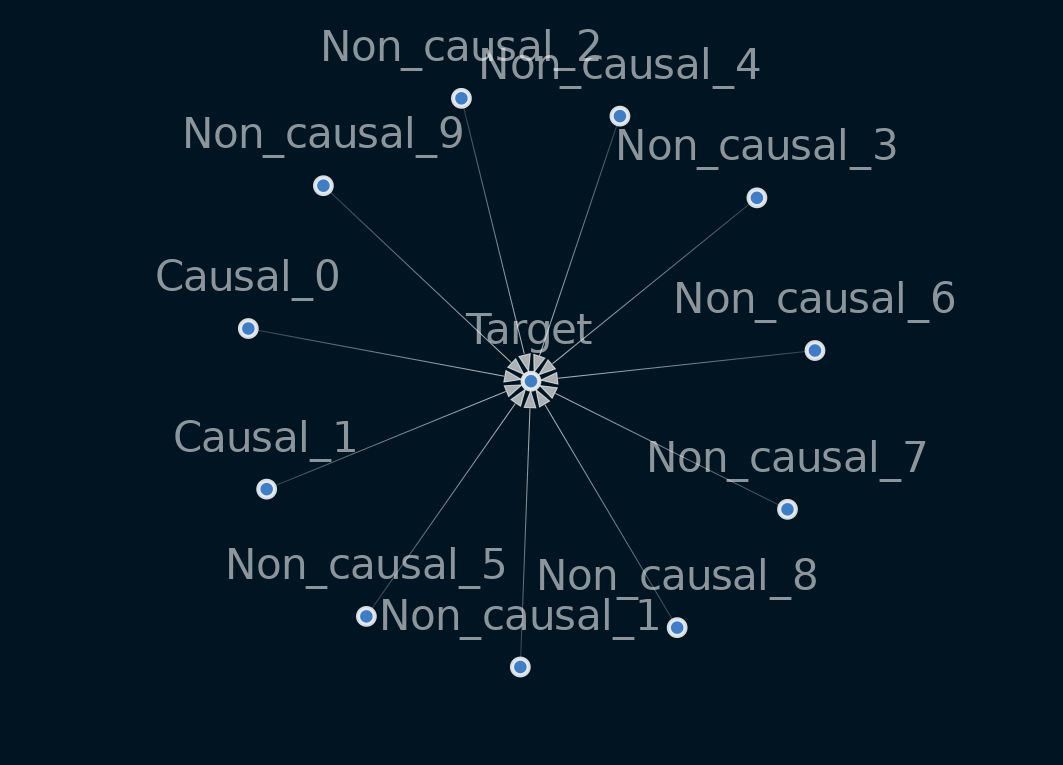

In [46]:
viz = plot_structure(
    sm,
    graph_attributes={"scale": "0.8"},
    all_node_attributes=NODE_STYLE.WEAK,
    all_edge_attributes=EDGE_STYLE.WEAK)
Image(viz.draw(format='png'))